# 1 House Sales in King Country, USA

## 1.1 Business Problem

1. Which homes are recommended for purchase and at what price?
2. Which homes in the portfolio are recommended for sale and at what price?

## 1.2 Business Scenario

To make a good profit, the company manager needs to know the best houses and the best time to buy or sell the property, and which attributes impact the value of the houses.

# 2 Development Environment

## 2.1 Python Libraries

In [49]:
import pandas as pd
from IPython.display import Image
import plotly.express as px

## 2.2 Setting

In [2]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

# 3 Extract, Transform and Load - ETL 

## 3.1 Extraction

In [3]:
data = pd.read_csv('../data/kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5,-122.3,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7,-122.3,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7,-122.2,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5,-122.4,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6,-122.0,1800,7503


### 3.1.1 Data Dictionary

In [5]:
data_dictionary = {'id': 'Unique ID for each home sold', 
                   'date': 'Date of the home sale', 
                   'price': 'Price of each home sold',
                   'bedrooms': 'Number of bedrooms', 
                   'bathrooms': 'Number of bathrooms, where .5 accounts for a room with a toilet but no shower, .75 or ¾ bath is a bathroom that contains one sink, one toilet and a shower or a bath.', 
                   'sqft_living': 'Square footage of the apartments interior living space',       
                   'sqft_lot': 'Square footage of the land space', 
                   'floors': 'Number of floors', 
                   'waterfront': 'A dummy variable for whether the apartment was overlooking the waterfront or not', 
                   'view': 'An index from 0 to 4 of how good the view of the property was', 
                   'condition': 'An index from 1 to 5 on the condition of the apartment', 
                   'grade': 'An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design',        
                   'sqft_above': 'The square footage of the interior housing space that is above ground level', 
                   'sqft_basement': 'The square footage of the interior housing space that is below ground level', 
                   'yr_built': 'The year the house was initially built', 
                   'yr_renovated': 'The year of the house’s last renovation', 
                   'zipcode': 'What zipcode area the house is in',       
                   'lat': 'Lattitude', 
                   'long': 'Longitude', 
                   'sqft_living15': 'The square footage of interior housing living space for the nearest 15 neighbors', 
                   'sqft_lot15': 'The square footage of the land lots of the nearest 15 neighbors'}

In [6]:
for key, value in data_dictionary.items():
    print(f'{key}: {value}')
    print('')

id: Unique ID for each home sold

date: Date of the home sale

price: Price of each home sold

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower, .75 or ¾ bath is a bathroom that contains one sink, one toilet and a shower or a bath.

sqft_living: Square footage of the apartments interior living space

sqft_lot: Square footage of the land space

floors: Number of floors

waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not

view: An index from 0 to 4 of how good the view of the property was

condition: An index from 1 to 5 on the condition of the apartment

grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design

sqft_above: The square footage of the interior housing space that is above ground level

sqft_basement: The square footage o

### 3.1.2 Size

In [7]:
print(f'Columns: {data.shape[1]}')
print(f'Rows: {data.shape[0]}')

Columns: 21
Rows: 21613


### 3.1.3 Types

In [8]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

id: Can be a string

### 3.1.4 NaN

In [9]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 3.1.5 Descriptions 

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4580301520.9,2876565571.3,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
price,21613.0,540088.1,367127.2,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,3.4,0.9,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,2.1,0.8,0.0,1.8,2.2,2.5,8.0
sqft_living,21613.0,2079.9,918.4,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,15107.0,41420.5,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,1.5,0.5,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0
view,21613.0,0.2,0.8,0.0,0.0,0.0,0.0,4.0
condition,21613.0,3.4,0.7,1.0,3.0,3.0,4.0,5.0


## 3.2 Transformation

### 3.2.1 Change dtypes

In [17]:
# id to str
data['id'] = data['id'].astype('str')

# date to datetime
data['date'] = pd.to_datetime(data['date'])

### 3.2.2 New features

In [38]:
# Month
data['month'] = pd.to_datetime(data['date'].dt.strftime('%Y-%m'))

# Semester - Summer or winter
# Spring and summer: Setember 20 to 19 March
# Autumn and winter: 20 March to 19 Setember
data['season'] = data['date'].dt.month.apply(lambda x: 'spring-summer' if x in [10, 11, 12, 1, 2, 3] else 'autum-winter')

## 3.3 Load

In [42]:
data.to_csv('../data/data_etl.csv')

# 4 Data Exploration

In [43]:
data_2 = pd.read_csv('../data/data_etl.csv')

## 4.1 Hypotesis 

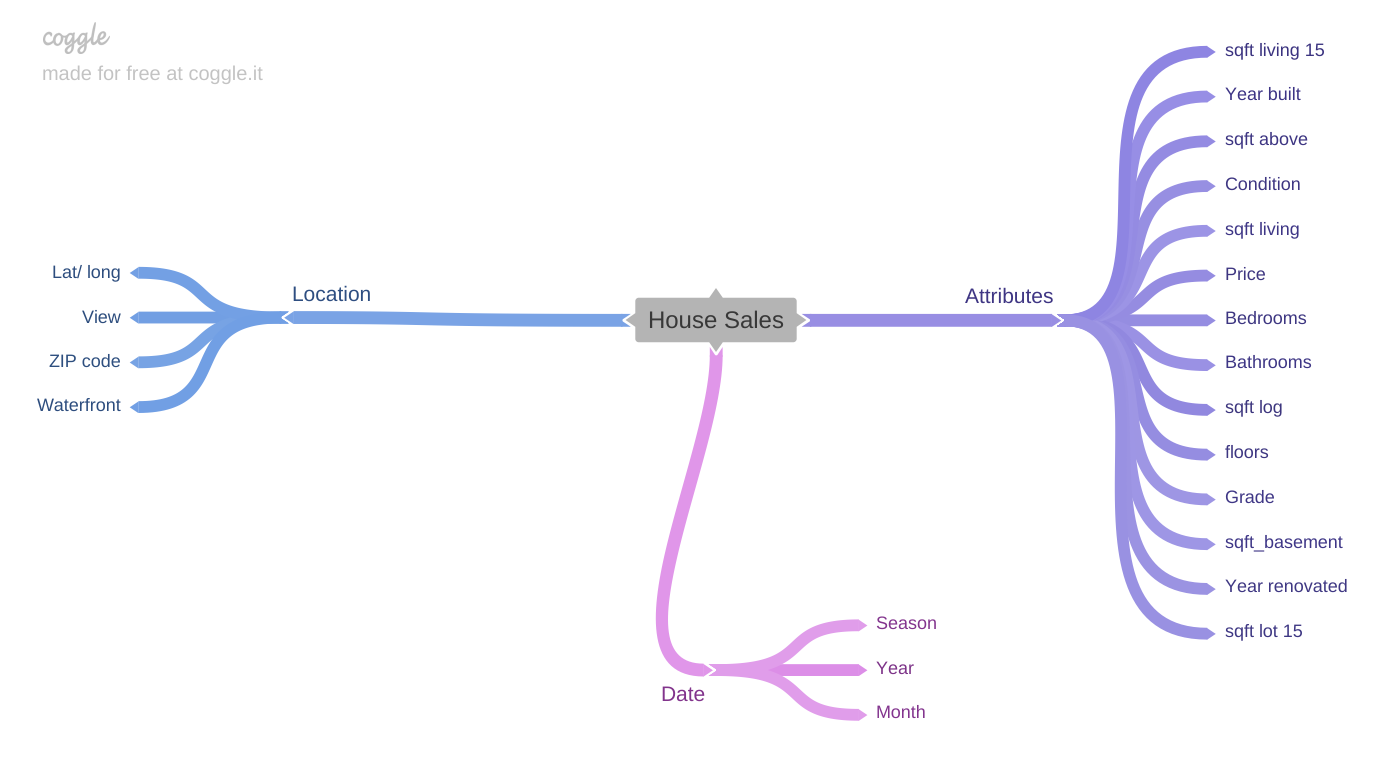

In [46]:
Image('../img/House_Sales.png')

### 4.1.1 Attribues hyphotesis

1. The longer the construction time, the lower the prices;
2. The best house condition increase prices;
3. The increase in number of bedrooms increase prices;
4. The increase in number of bathrooms increase prices;
5. Increasing grade increases prices;

### 4.1.2 Location hyphotesis

1. Better view raises prices;
2. Houses with waterfront is more expensive;
3. The zip code region have influences in prices;

### 4.1.3 Date hyphotesis

1. In spring and summer seasons the houses is more expensive;

## 4.2 Univariate Analysis

### 4.2.1 Response variable

In [53]:
px.histogram(data, x='price', title='Price distribution')

In [56]:
px.box(data, y='price', title='Price description')

## 4.3 Bivariate Analysis

## 4.4 Multivariate Analysis